## Описание проекта

В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

#### Описание данных

Name — название игры;
    Platform — платформа;
    Year_of_Release — год выпуска;
    Genre — жанр игры;
    NA_sales — продажи в Северной Америке (миллионы проданных копий);
    EU_sales — продажи в Европе (миллионы проданных копий);
    JP_sales — продажи в Японии (миллионы проданных копий);
    Other_sales — продажи в других странах (миллионы проданных копий);
    Critic_Score — оценка критиков (максимум 100);
    User_Score — оценка пользователей (максимум 10);
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
games = pd.read_csv('/datasets/games.csv')

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Для удобства работы с данными приведем к нижнему регистру
games.columns = games.columns.str.lower()

In [4]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вот, что нужно привести:
год релиза;  
оценку пользователей к числам с плавающей запятой;

In [6]:
# Заменим отсутвующие значения в столбце year_of_release на значение которое не помешает последующей работе
games['year_of_release'] = games['year_of_release'].fillna(-1)
games['year_of_release'] = games['year_of_release'].astype('int')

In [7]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - аббревиатура от To Be Determined которое используется например на сайте Metacritic. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Предполагаю, что с таким можно столкнуться, когда анализируешь или малопопулярные игры, или игры, имеющие происхождение и, соответственно, аудиторию, большая часть игроков которых не разговаривает по-английски и не оставляет свои отзывы на таких мировых сайтах как Metacritic. По сути данные значения можем заменить на Nan.

In [8]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [9]:
# Давайте также приведем к нижнему регистру значения столбцов
games['name'] = games['name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating'] = games['rating'].str.lower()

In [10]:
# Обработайте пропуски при необходимости
games.duplicated().sum()

0

In [11]:
# Проверим преимущественно ли старым играм наличие пропусков
games.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Нет пропуски имеются как в старых играх, так и недавно вышедших.

In [12]:
# Заменим пропущенные значения в столбце user_score и critic_score 
# на несуществующие значения которые не помешают нам в последующей работе
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)
games['rating'] = games['rating'].fillna('out of rating')
games['genre'] = games['genre'].fillna('no genre game')
games['name'] = games['name'].fillna('no name game')

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


И так с обработкой данных, на наличие пропусков мы закончии можем приступить к дальнейшей работе.

In [14]:
# Посчитаем количество продаж во всех регионах и запишем в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,out of rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,out of rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1.00,-1.00,out of rating,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,-1.00,-1.00,out of rating,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,-1.00,-1.00,out of rating,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1.00,-1.00,out of rating,0.01


После изучения представленных данных, сложно установить причины данных недочетов. Представленные пропуски имелись как в играх выпущенных давно, так и совсем недавно. Так же имелся артефакт в виде значения tbd, в ходе изучения которого выяснилось что это аббревиатура от To Be Determined, которое ставится при совсем низком количестве оценок и отзывов при публикации, данные артефакты мы заменили на Nan, которыми они по сути и являются. Так же в данном разделе мы целенаправлено заменили некоторые значения на несуществующие данные не помешающие в дальнейшей работе, с целью избавления от Nan. Добавили столбец показывающий количество общих продаж по представленным регионам. 

## Проведите исследовательский анализ данных

Так нам необходимо будет строить много диаграмм напишем функцию

Text(0.5, 1.0, 'Распределение по годам релиза')

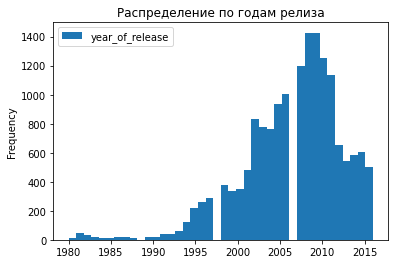

In [15]:
# Посмотрим количество выпущенных игр в каждый год
ax = games[games['year_of_release'] != -1]['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам релиза')

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь. С 95-года росли чипы видеоадаптеров в мощности, соответственно график релизов тоже рос. С 2010 года спад, насыщение рынка, переход на мобильные платформы, ну и, видимо, инвесторы рисковать перестали.

До 1994 года и Pentium 1 игр практически не было. Потом они начали появляться, сначала на MS-DOS, потом уже на Windows. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

### Построим распределение по годам релиза для игр с отзывом и без отзыв и cравним полученные распределения

Text(0.5, 1.0, 'Отзывы и без отзыва — критики')

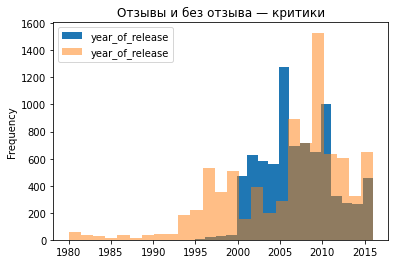

In [16]:
games[(games['year_of_release'] != -1) & (games['critic_score'] > 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
games[(games['year_of_release'] != -1) & (games['critic_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend()
plt.title('Отзывы и без отзыва — критики')

Text(0.5, 1.0, 'Отзывы и без отзыва — пользователи')

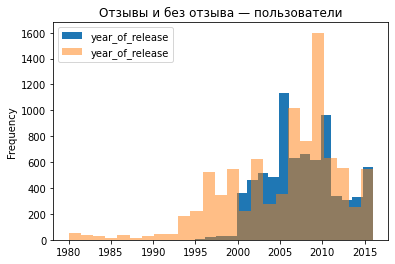

In [17]:
games[(games['year_of_release'] != -1) & (games['user_score'] > 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
games[(games['year_of_release'] != -1) & (games['user_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend()
plt.title('Отзывы и без отзыва — пользователи')

Выглядят похожими между собой. Скорее всего, из-за того, что чаще всего критикам выгодно сходится с мнением пользователей. Либо мнение критиков и пользователей косвенно влияют друг на друга, под влиянием общего информационного поля, хайпа и пиар компаний.

Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

На мой взгляд, актуальным периодомявляется период с 2014 по 2016 год:

это год, когда вышли или вот-вот выйдут все популярные консоли;
в этом периоде представлены данные по абсолютно всем самым популярным консолям.
Предыдущие года отбросим.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:
Какие платформы лидируют по продажам, растут или падают?

In [18]:
actual_platform = games.query('year_of_release >= 2014')

In [19]:
actual_platform.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


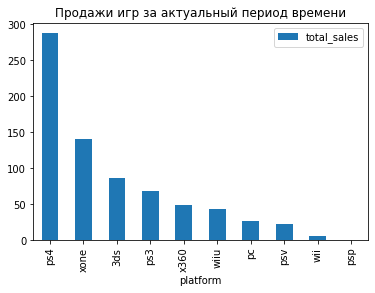

In [20]:
actual_platform.groupby(by='platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False).head(10).plot(kind='bar', title = 'Продажи игр за актуальный период времени');

Если брать актуальный период по продажам игр начиная с 2014 года (год релиза консолей нового поколения PS4 и Xbox One), то мы видим что с большим преимуществом на первом месте платформа PS4, на втором с отстованием практически в два раза находится Xbox One, далее консоль Nintendo 3ds. Это можно объяснить большим вниманием компании Sony к выпуску экслюзивов для своей консоли, кооперацией с издательствами и непосредственно разработчиками. Возможно Майкрософт данному вопросу уделяет меньше своих ресурсов.

### Построим график продаж по каждому году

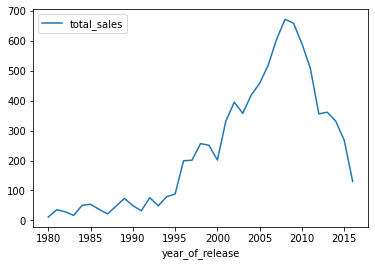

In [21]:
games[games['year_of_release'] != -1].groupby('year_of_release').agg({'total_sales':'sum'}).plot();

Игровой рынок сдувается с 2008 года. Возможно виной тому наступления мирового кризиса и не желанием инвесторов рисковать.

Рост продаж до 2008 года можно объяснить стремительным развитием технологий (таких как центральные процессоры, графические процессоры, оперативная память DDR4 и т.д.), удешевлением стоимости этих же технологий, тем самым разработчики меньше ограничены в ресурсах при разработке. Так же одной из причин возможна общая стабильность на мировом рынке, никаких потрясений в виде кризиса не предполагалось.  

### Построим ящик с усами по глобальным продажам

In [22]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,"16,715.00","16,715.00","16,715.00","16,715.00","16,715.00","16,715.00","16,715.00","16,715.00"
mean,"1,974.18",0.26,0.15,0.08,0.05,33.06,2.69,0.53
std,252.69,0.81,0.50,0.31,0.19,36.30,4.17,1.55
min,-1.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,70.00,7.30,0.47
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


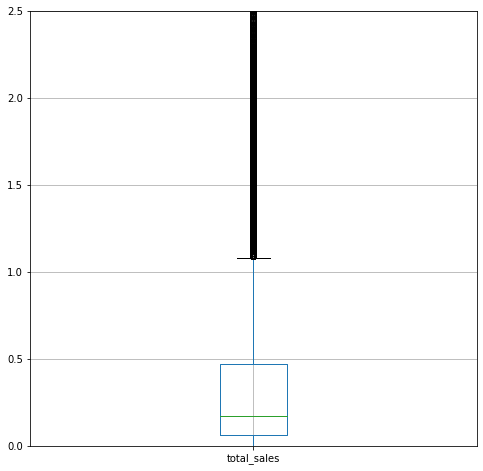

In [23]:
plot = games.boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

Все или ничего, в общем обычная судьба игроделов - выпустить какую-нибудь игру и заработать на этом немного деньжат, не факт, что не в минус. Но игровые конгломераты не дремлют и устраивают AAA-выбросы рынку.

### Узнаем на какой платформе было выпущено больше всего игр

In [24]:
most_popular_platform = games.groupby('platform').agg({'name':'count'}).reset_index()
most_popular_platform.sort_values(by='name', ascending=False).head()

,platform,name
16,ps2,2161
4,ds,2151
17,ps3,1331
25,wii,1320
28,x360,1262


Плейстейшн 2 побеждает. Возможно это связано с длительным временем нахождения данной платформы на рынке, задержкой выпуска консоли следующего поколения, а так же примерно через год после релиза PS3 грянул мировой кризис, который внес свои коррективы в планы инвесторов.

### Определим, игр какого жанра больше всего

In [25]:
most_popular_genre = games.groupby('genre').agg({'name':'count'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head()

,genre,name
0,action,3369
11,sports,2348
3,misc,1750
8,role-playing,1498
9,shooter,1323


Экшен победил. Возможно по причине своей зрелищности и высоких продаж.

### Найдем игры с наибольшей и наименьшей оценкой:
    от критиков;
    от пользователей.

In [26]:
# Изучим корреляцию между оценками критиков и пользовательскими оценками
games[games['user_score'] > 0].sort_values(by='user_score').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13682,myth makers: trixie in toyland,wii,2008,platform,0.04,0.00,0.00,0.00,-1.00,0.20,e,0.04
9970,madden nfl 17,ps3,2016,sports,0.07,0.02,0.00,0.02,-1.00,0.20,e,0.11
5764,happy feet,ds,2006,action,0.27,0.01,0.00,0.02,-1.00,0.30,e,0.30
13380,billy the wizard: rocket broomstick racing,wii,2007,racing,0.04,0.00,0.00,0.00,-1.00,0.30,e,0.04
10262,charlie and the chocolate factory,xb,2005,adventure,0.08,0.02,0.00,0.00,39.00,0.50,e,0.10


In [27]:
games[games['user_score'] > 0].sort_values(by='user_score', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14412,breath of fire iii,psp,2005,role-playing,0.00,0.02,0.00,0.01,-1.00,9.70,t,0.03
8975,boktai: the sun is in your hand,gba,2003,role-playing,0.10,0.04,0.00,0.00,83.00,9.60,e,0.14
3417,harvest moon: friends of mineral town,gba,2003,simulation,0.34,0.13,0.11,0.01,81.00,9.60,e,0.59
11119,super puzzle fighter ii,gba,-1,puzzle,0.06,0.02,0.00,0.00,83.00,9.50,e,0.08
10105,cory in the house,ds,2007,action,0.10,0.00,0.00,0.01,-1.00,9.50,e,0.11


In [28]:
games[games['critic_score'] > 0].sort_values(by='critic_score').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13689,ride to hell,ps3,2013,racing,0.02,0.01,0.00,0.01,13.00,1.00,m,0.04
10662,leisure suit larry: box office bust,ps3,2009,adventure,0.06,0.03,0.00,0.01,17.00,1.70,m,0.10
12822,ride to hell,x360,2013,racing,0.04,0.01,0.00,0.01,19.00,1.30,m,0.06
10015,rugby 15,ps4,2015,sports,0.04,0.06,0.00,0.02,19.00,3.40,e,0.12
15343,balls of fury,wii,2007,sports,0.02,0.00,0.00,0.00,19.00,2.80,e10+,0.02


In [29]:
games[games['critic_score'] > 0].sort_values(by='critic_score', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
227,tony hawk's pro skater 2,ps,2000,sports,3.05,1.41,0.02,0.20,98.00,7.70,t,4.68
57,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,98.00,7.50,m,10.50
51,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,98.00,7.90,m,11.00
5350,soulcalibur,dc,1999,fighting,0.00,0.00,0.34,0.00,98.00,8.80,t,0.34
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.00,7.90,m,5.47


In [30]:
critic_score = games[games['critic_score'] != -1]
user_score = games[games['user_score'] != -1]

In [31]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

In [32]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,58.09%
user_score,58.09%,100.00%


In [33]:
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score
critic_score,1.000000,0.580878
user_score,0.580878,1.000000


Определенно корреляция в оценках подтверждается.

### Составим портрет пользователя для каждого региона

Для пользователей каждого региона (Северная Америка, Европа и Япония) определите:

    топ-5 предпочтительных жанров;
    в какие года пользователи были наиболее активны (больше всего покупали игры);
    топ-5 предпочтительных платформ;
    какой рейтинг ESRB встречается чаще всего (наиболее частотная категория);

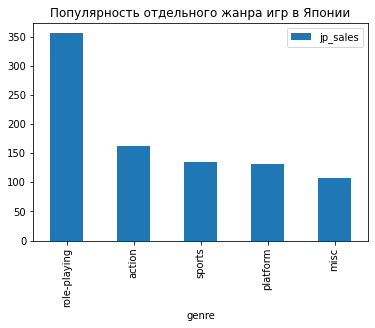

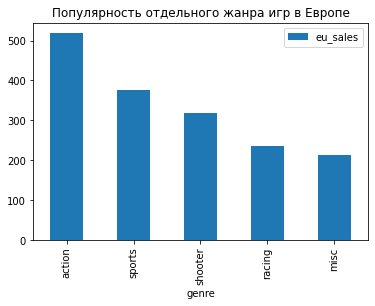

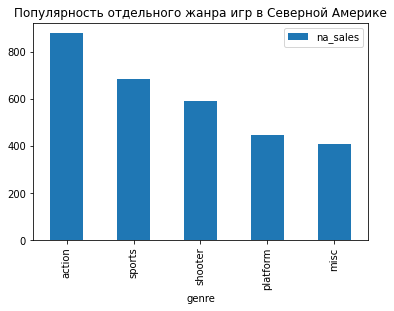

In [34]:
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Популярность отдельного жанра игр в Японии');
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title = 'Популярность отдельного жанра игр в Европе');
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title = 'Популярность отдельного жанра игр в Северной Америке');

В Японии большую популярность имеют ролевые игры, когда как в Европе и Северной Америке большей популярностью пользуются экшены.

### В какие года пользователи были наиболее активны (больше всего покупали игры)

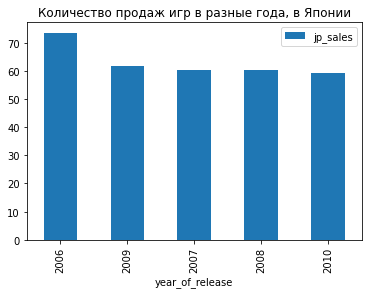

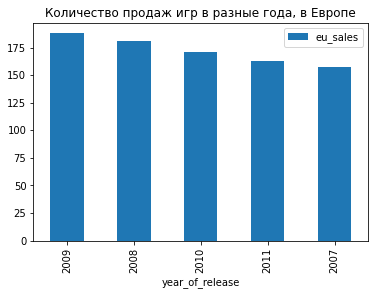

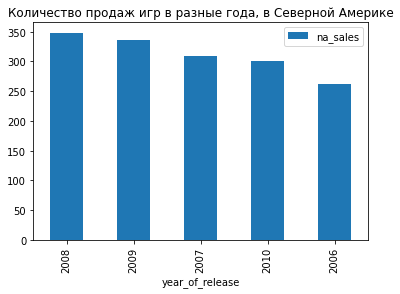

In [35]:
games.groupby(by='year_of_release').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Количество продаж игр в разные года, в Японии');
games.groupby(by='year_of_release').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title = 'Количество продаж игр в разные года, в Европе');
games.groupby(by='year_of_release').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title = 'Количество продаж игр в разные года, в Северной Америке');

Самые высокие продажи в Японии зафиксированы в 2006 году, в Европе в 2009 году и в Северной Америке в 2008 году.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

Добавим новый столбец в основной датафрейм с разъяснением, какая буква рейтинга что означает:

In [36]:
games['rating'].unique()

array(['e', 'out of rating', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [37]:
ESRB_dict = {'e': 'для всех', 'm': '> 17 лет', 't': '13-19 лет', 'e10+': '>10 лет', 'k-a': 'для всех(устар.)', 'ao':'только для взрослых18+', 'ec':'для детей младшего возраста3+', 'rp': 'рейтинг ожидается'}

In [38]:
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

Посмотрим на продажи игр по рейтингу:

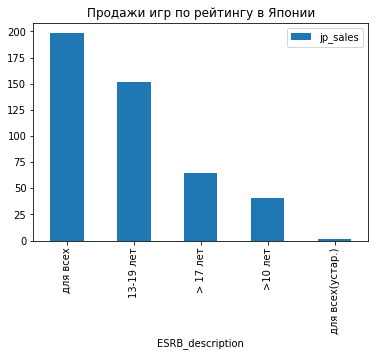

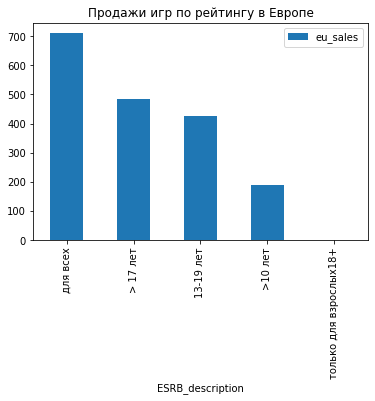

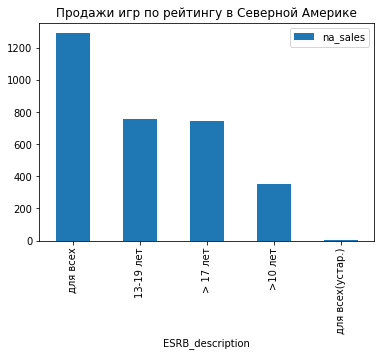

In [39]:
games.groupby(by='ESRB_description').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Продажи игр по рейтингу в Японии');
games.groupby(by='ESRB_description').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title = 'Продажи игр по рейтингу в Европе');
games.groupby(by='ESRB_description').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title = 'Продажи игр по рейтингу в Северной Америке');

Группа для всех — лидер в Европе, Япония и США. Логично, так как название группы предполагает максимальный охват. Дальше начинаются различия.

В Японии: 13-19 лет и > 17 лет делят второе и третье место. И группа в 13-19 лет крупнее более, чем в два раза.

В Европе: > 17 лет и 13-19 лет занимают второе и третье соответственно, где группа >17 лет имеет небольшой  прирост по сравнению с группой 13-19 лет.

В США: 13-19 лет и 17 лет делят второе и третье место и группы примерно равны между собой.

### Топ-5 предпочтительных платформ

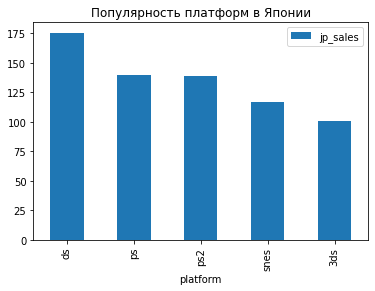

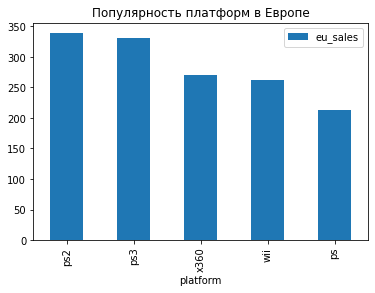

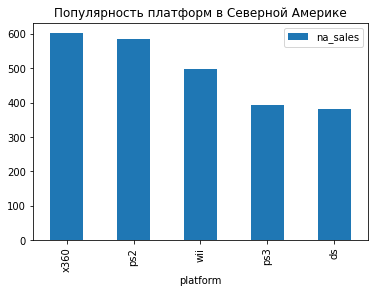

In [40]:
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar', title = 'Популярность платформ в Японии');
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar', title = 'Популярность платформ в Европе');
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar', title = 'Популярность платформ в Северной Америке');

На родине Майкрософта доминирует он же. Европа любит приставку Японии. А в самой Японии предпочитают приставку Nintendo ds.

На данный момент исследование можем сделать вывод, что высокие продажи игр во всех представленных регионах имеют рейтинг ESRB "Е". В Европе и Северной Америке больше предпочитают жанры Action, когда в Японии большую популярность имеют игры жанра RPG. Так же нужно взять в расчет, что в отличие от Европы и Северной Америки, в Японии платформы попадающие в TOP-5 популярности представлены только платформами отечественного производства, т.е. изделие Майкрософта в этот список не входит. Возможно это как то связано с разницей в менталитете и потребительских взглядах, Европа и Северная Америка близки как по менталитету так и имеют большое культурное влияние друг на друга. В отличие от Японии которая отличается как в плане менталитета или общей культуре.Так же мы можем утверждать что оперделенно существует корреляция в оценках пользователей и критиков.

### Проверим гипотезы

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
    Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
    Пороговое значение alpha задайте самостоятельно.

Поясните:

    как вы формулировали нулевую и альтернативную гипотезы
    какой критерий использовали для проверки гипотез и почему

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:
    
    H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
    
    H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [41]:
alpha = 0.05

In [42]:
xone = games[(games['platform'] == 'xone') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'pc') & (games['user_score'] > 0)]['user_score']

In [43]:
variance_xone = np.var(xone)
variance_xone

1.8965188383045526

In [44]:
variance_pc = np.var(pc)
variance_pc

2.3377471580367684

In [45]:
results = st.ttest_ind(xone, pc, axis = 0, equal_var = False, nan_policy = 'omit')

In [46]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем. Таким образом верно утверждение, что средний пользовательский рейтинг платформ Xbox One и PC различается.

Гипотезы:
    
    H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
    
    H1: средний пользовательский рейтинг жанров Action и Sports различается

In [47]:
action = games[(games['genre'] == 'action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'sports') & (games['user_score'] > 0)]['user_score']

In [48]:
variance_action = np.var(action)
variance_action

2.03063665382663

In [49]:
variance_sports = np.var(sports)
variance_sports

2.594160671177017

In [50]:
results = st.ttest_ind(action, sports, axis = 0, equal_var = False, nan_policy = 'omit')

In [51]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получается. Таким образом верно утверждение, что средний пользовательский рейтинг жанров Action и Sports одинаковый

## Напишим общий вывод по данному исследованию

Геймдев выглядит печально уже 10 лет как. Тем не менее люди играть не перестали и разработчики тоже выпускают игры, хотя делают это более осмотрительно, оценивая все риски. Так же большую роль на падение продаж среди игр, стало стремительное развитие мобильной индустрии игр, в связи с чем инвесторам выгоднее вкладываться именно в нее так как разработка стоит в разы дешевле, а прибыли больше. Ну и японцам ролевые игры нравятся, возможно по этой причине страны Азии лидируют по выпуску RPG и MMORPG, и в настоящее время.

По полученным данным появилась возможность построить план действий по каждому региону.

По проведенному анализу данных мы можем сказать, что во всех обозреваемых регионах пользуются популярностью игры с рейтингом ESRB: "Е", "М", "Т". Так же мы увидели что определенно существует корреляция между мнение критиков и пользователей, данный момент можно использовать при проведении рекламной компаний. Если мы решим сконцентрировать свое внимание на рынок Японии, то нам просто необходимо знать что в данном регионе практически не представлены консоли производства Майкрософта.